# Curse of Dimensionality
When you have too many features and not enough data, your distance based machine learning models will tend to overfit.  
As dimensions increase, data tends to become more sparse, and in high dimensioned data this data also tends to be equidistant, 
limiting the effectiveness of distance based ML algorithms.  
Also, often in high dimensional data, many dimensions are irrelevant and can mask existing clusters in noisy
data. See <a href="https://www.kdd.org/exploration_files/parsons.pdf">Subspace Clustering for High Dimensional Data: A Review ∗ Lance </a><br>
This is why dimensionality reduction is so important.

This notebook illustrates how a constant amount of data will tend to 'spread out' as dimensionality increases. Note how the amount of data that falls into a target zone will decrease as dimensionality increases.  This is evidence that data becomes more sparse as dimensionality increases. You can compensate for this by getting more data, or by reducing your datasets dimensionality.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#the following gives access to utils folder
#where utils package stores shared code
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.getcwd(),
                  os.pardir)
)

#only add it once
if (PROJECT_ROOT not in sys.path):
    sys.path.append(PROJECT_ROOT)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Constants

In [91]:
NUMB_POINTS=100
NUMB_DIMENSIONS=10

# Problem

Suppose you have NUMB_POINTS points randomly assigned between 0 and 2,  in a 3 dimensional space (using the first 3 dimensions from dims)

In [95]:
dims = np.random.rand(NUMB_DIMENSIONS,NUMB_POINTS)*2
# dims

ignore= is sprinkled throughout the notebook to keep jupyter from printing rubbish type info as well as the plots of interest. 3 extra project points to anyone who finds a solution to this

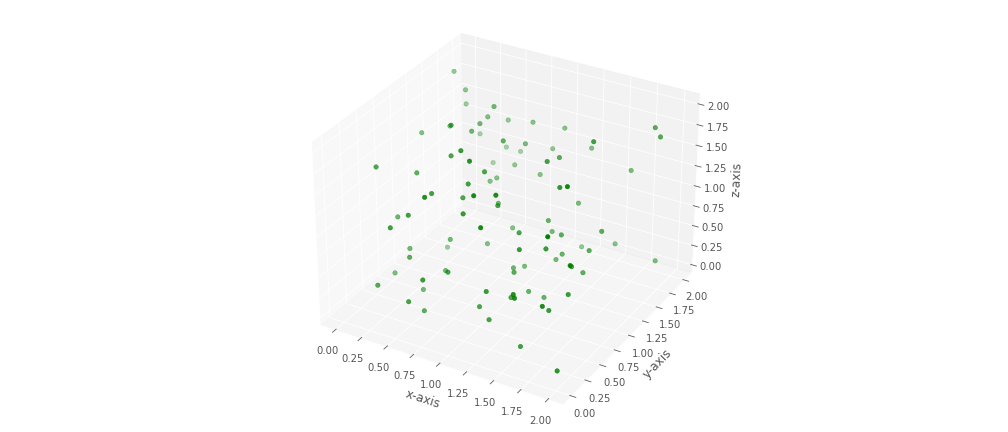

In [97]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib ipympl

# creating figure
fig = plt.figure(figsize=(14,6));

ax = Axes3D(fig,auto_add_to_figure=False)
ignore=fig.add_axes(ax)
ignore=ax.set_facecolor("white");
ignore=ax.grid(color="black");
# creating the plot
ignore=ax.scatter(dims[0], dims[1], dims[2], color='green')

# setting title and labels
ignore=ax.set_title("3D plot")
ignore=ax.set_xlabel('x-axis')
ignore=ax.set_ylabel('y-axis')
ignore=ax.set_zlabel('z-axis')
plt.show()

## Project these NUMB_POINTS points onto the x axis
note the % that fall withen 0 and 1

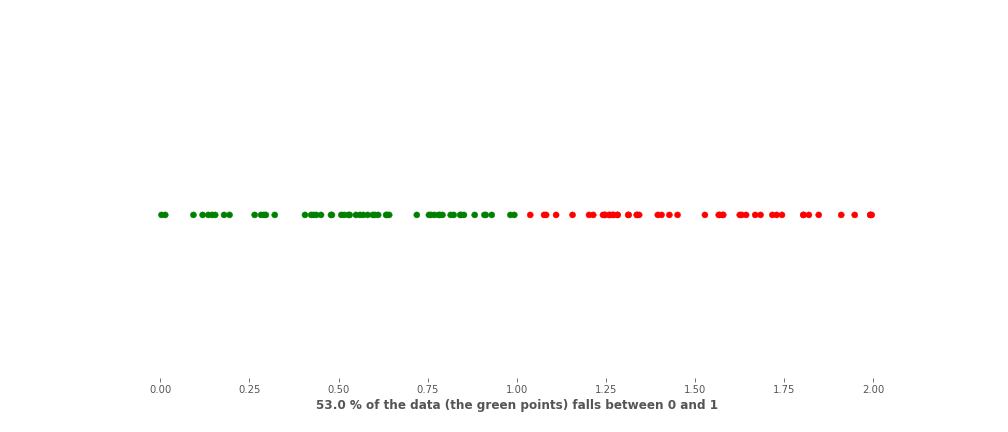

In [98]:
# from https://github.com/cfinch/Shocksolution_Examples/blob/master/Plotting/matplotlib/plot_without_axes.py

fig = plt.figure(figsize=(14,6));
ax1 = plt.axes(frameon=False);

ax1.get_xaxis().tick_bottom();   # Turn off ticks at top of plot

#ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False);     # Hide y axis
colors=['green' if val<=1 else 'red' for val in dims[0] ]
ax1.scatter(dims[0], y=[0]*len(dims[0]),  color=colors);
ax1.set_xlabel(f'{colors.count("green")/NUMB_POINTS*100} % of the data (the green points) falls between 0 and 1', fontsize='large', fontweight='bold')
plt.show();


## Now project these NUMB_POINTS points onto the x and y axis
note the % that fall withen the unit box below

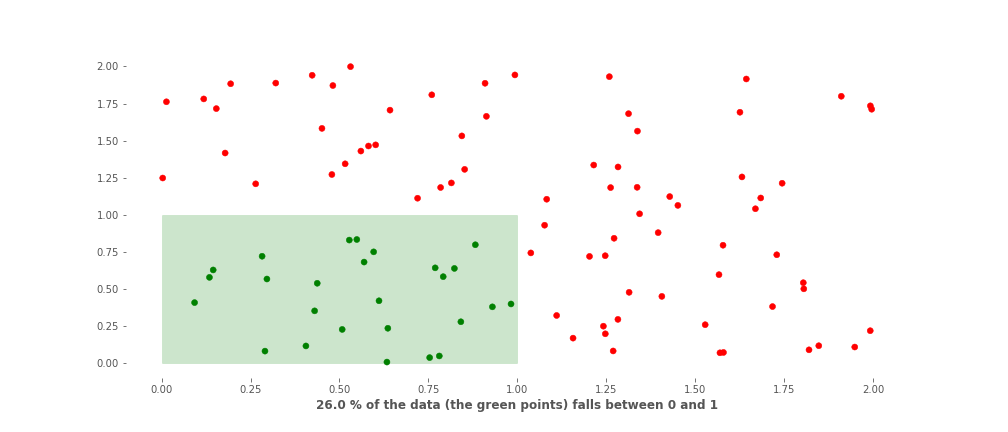

In [99]:
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(14,6));
ax1 = plt.axes(frameon=False);

ignore=ax1.add_patch(Rectangle((0, 0), 1, 1,color="green",alpha=.2))
colors=['green' if (valx<=1 and valy <=1) else 'red' for valx,valy in zip(dims[0],dims[1]) ]
ignore=ax1.scatter(dims[0], dims[1],  color=colors);
ignore=ax1.set_xlabel(f'{colors.count("green")/NUMB_POINTS*100} % of the data (the green points) falls between 0 and 1', fontsize='large', fontweight='bold')
plt.show();

## Now project these NUMB_POINTS points onto the x,y and z axis
note the % that fall withen the unit cube below

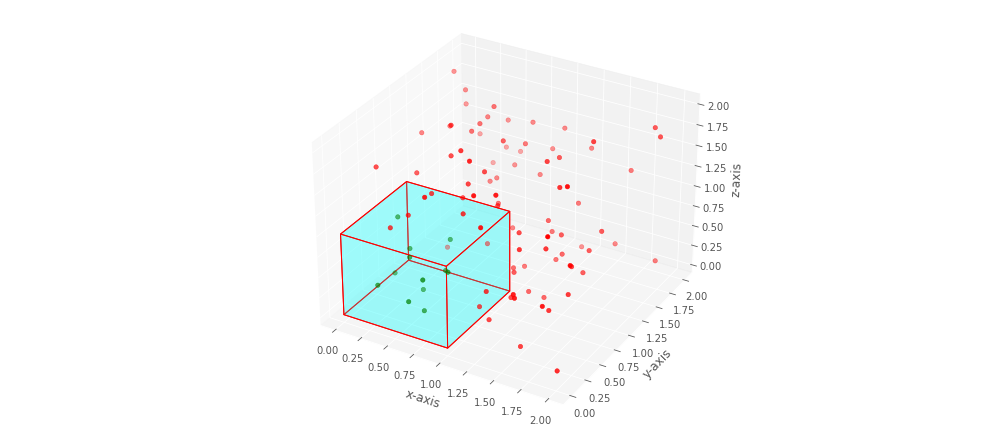

12.0 % of the data (the green points) falls between 0 and 1 


In [100]:
# %%capture
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
%matplotlib ipympl

# creating figure
fig = plt.figure(figsize=(14,6));

ax = Axes3D(fig,auto_add_to_figure=False);
ignore=ax.set_facecolor("white");
ignore=ax.grid(color="black");

ignore=fig.add_axes(ax,frameon=False)  #<Axes3D:>
# creating the plot
colors=['green' if (valx<=1 and valy <=1 and valz<=1) else 'red' for valx,valy,valz in zip(dims[0], dims[1], dims[2]) ]
ignore=ax.scatter(dims[0], dims[1], dims[2], color=colors)  #<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f98ea314070>

#these will be converted to vertices of each face
Z = np.array([[0, 0, 0], 
                   [1, 0, 0],
                   [1, 1, 0],
                   [0, 1, 0],
                   [0, 0, 1], 
                   [1, 0, 1],
                   [1, 1, 1],
                   [0, 1, 1]])
verts = [[Z[0],Z[1],Z[2],Z[3]],
 [Z[4],Z[5],Z[6],Z[7]],
 [Z[0],Z[1],Z[5],Z[4]],
 [Z[2],Z[3],Z[7],Z[6]],
 [Z[1],Z[2],Z[6],Z[5]],
 [Z[4],Z[7],Z[3],Z[0]]]
j=ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.20));

# setting title and labels
ignore=ax.set_title("3D plot")
ignore=ax.set_xlabel('x-axis')
ignore=ax.set_ylabel('y-axis')
ignore=ax.set_zlabel('z-axis')
plt.show();
print(f'\033[1m{colors.count("green")/NUMB_POINTS*100} % of the data (the green points) falls between 0 and 1 \033[0m')
plt.figure().clear();
plt.close()

#the following for bold
# \033[1m  start bold
# \033[0m stop bold


## What happens with 4 dimensions?
Cannot plot 4 dimensions but we can see if those NUMB_POINTS points lay within a 1x1x1x1 feature space<br>

In [101]:
numb_hits=sum([1 if (valx<=1 and valy <=1 and valz<=1 and vala<=1) else 0 for valx,valy,valz,vala in zip(dims[0],dims[1],dims[2],dims[3]) ])
# colors=['green' for valx,valy,valz,valq in zip(x,y,z,q) ]
# colors
print(f'{numb_hits/NUMB_POINTS*100} % of the data (the green points) falls between 0 and 1')

4.0 % of the data (the green points) falls between 0 and 1


## What about higher dimensions?
Its relatively easy to extend the above concepts to calculate the continued sparsity as more dimensions are considered

# What about distance between points?  How does that behave as number of dimensions increase?
For this <mark>random</mark> dataset, you will find that the mean distance between points increases as the number of dimensions increase.  The standard deviation will remain relatively constant though, which makes sense given that its a random distribution.

In [102]:
import math
def get_euc_dist(dims, pt1,pt2,dims_to_use):
    pt1=[dims[pt1][val] for val in range(dims_to_use)]
    pt2=[dims[pt2][val] for val in range(dims_to_use)]
    return math.dist(pt1,pt2)

# see https://stackoverflow.com/questions/51676404/how-to-calculate-distance-from-points-in-lists
# for suggestions on vectorizing this code using a list comprehension
def get_distances(dims):
    '''
    for every number of dimensions, starting from 1 and going to ncols,
    calculates the distances between all points in dims
    
    dims: random multidimensional array of points
    returns: distances, a dict that holds 1 entry for every number of dimensions
             that entry will have the distance from every point to every other point
        
    '''
    ncols=dims.shape[1] # the otal number of dimensions (columns) per point
    distances={}    

    for numb_dims in range(1,ncols+1):
        # gradually increase the number of dimensions from 1 to 2 etc
        dst=[]
        for i,val in enumerate(dims):
            for j in range(i+1, len(dims)):
                # dst.append( (i,j,get_euc_dist(dims, i,j,numb_dims))) 
                dst.append( get_euc_dist(dims, i,j,numb_dims))
        distances[numb_dims]=dst
    return distances

distances = get_distances(dims)

In [103]:
import statistics

#lets get a list of the mean distances between points per dimension as well as standard deviation
means = [statistics.mean(item) for item in distances.values()]
stdevs = [statistics.pstdev(item) for item in distances.values()]

#and the corresponding dimensions
dimensions=list(range(1,len(means)+1))

In [104]:
import pandas as pd
info=pd.DataFrame(data=list(map(list, zip(dimensions, means,stdevs))), columns=["Number_Dimensions", "Mean_Distance","Standard_Deviation"])

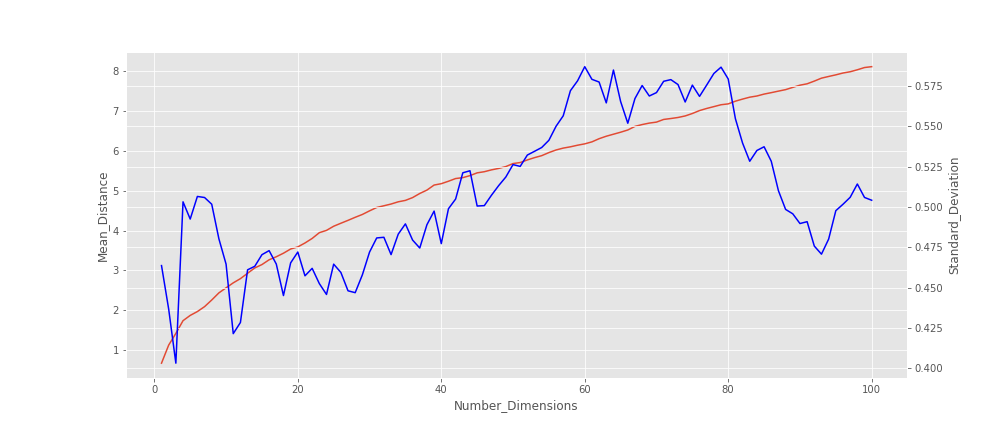

In [105]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(14,6))
sns.lineplot(data=info,y="Mean_Distance",x="Number_Dimensions", ax=ax1 );
ax2 = ax1.twinx();
sns.lineplot(data=info,y="Standard_Deviation",x="Number_Dimensions",ax=ax2,color='blue' );